## $$ K    Nearest Neighbours $$

$ K-nearest neighbors $ is a classification (or regression) algorithm that in order to determine the classification of a point, combines the classification of the K nearest points. It is supervised because you are trying to classify a point based on the known classification of other points.

$ K-means $ is a clustering algorithm that tries to partition a set of points into K sets (clusters) such that the points in each cluster tend to be near each other. It is unsupervised because the points have no external classification

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [115]:
import sklearn
display(sklearn.__version__ )
import sys
sys.version

'0.19.1'

'3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]'

### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src = "https://public.boxcloud.com/d/1/b1!jEbsX78rwXJSvl2wJNK4B-QLb4B5lH1eLeqFkxnHz0g7gnOlL76oXDp7Fcy8ysV7WBmBOFzMhZ3JLVIWX3A2IrPNYj5EA6WdMWMxTaweXK0vvngfY_Y2PeBmrP8cyGF3SUsYYSLSUg0w0QHpHDTa5YdU_aX-nrUiMuJMdXq5yGcIHQFj4blZbDBD2doISs6WliuOeCMbFqFwPLmHyUvd9z_3oqfz2vDyWWMGpHvGZN_nANiTi0P4b99uSz5Q1yDZ4ExOVzn6QSPvgZdnU9-0fSpx7d0BV8lafz-tfHLTBPY67HL0-7XTi94gRmZTxrMXz6MvZqc59nvQA1dF7eqL0Azx5anOzZ2shqRCtAYffzHbB24AThYApDQwL9hs83AtHNm_U19LooycFvTAYFFOQexMv2eNHYmnopUPjyZvtdyTIXr_MJgT0yOGVQgYCi-9lmlM9s4ZZrNal-uDoJiBG0V6UP6Z8k0ws3ptUUhQv5M5lAjpqWRXfoXCNucFPNv61d519TOS0K4CyNRLhLcWTaINPtValTQUdm030APdnA6err4yNa-vTtGJWA4gu-4nSLQDmyO94F4jXV1mYv-tOuXYPO89lIYTj7-Yz3nCsvYQWR_5NnWhwxuUDjdrIzsAMs3x5JbW5HLGl8aH96Xpjk_qFsgQErDcXVBNonAQffOZVd3GAAgfBIGj-SM6LUrRM28MxxmwzJOTBhWiUGQ0seTKyOwol0IZEFyBabgJBnECqHblLLjviOs6BNHK9NwbKJZWvLCPkLFTMmpx7qwyjDMqA6_I1DSabYdbL1iejxn_pyGz64PduLB1KuzNgb8IDNL6UPEnYr4-l5e-2huyhas3VTY0O5iueRq-mZ7gvKCUBIShvsgsy_c28qQT9YL4D9oIg8kgWeVSiEkcaRQx_M44i-hE4Iy25UbogEuc58CTFYKyky8-tHWJkoNVsiKZ5E4BP-7YmoVVJrvfTi6HLGc-HXkZEOuzEfFoRWURZcuiTT-pjKUiEfX0-96otrOQyF2M48N1BpLajTplnjYH0LVfwJzEKGtbjNVoxHLMfG0L5G_LC9F5ny-dHn-qCDwa9G2yL746CloRlBi3lWLXituHjR78Xx8yUiYcOZOQSR_h9mNKOMI6kMYSrPPffmiNcPDmfQNWOsuQSnqh17bPD54yK81onoEOep2vRjlACd163Se5WDzGrm55Oms4kT47oAjlpSzpnkNZHzZ3_b9BTVEaPewTCkCh-ip8Vqrsgc1pTkDY9SVSfs1Jr6wwW4nl2eo-SFDxY0Q_pevbo7v_f-kYFLCNa6vG_KdTHoNYgpQ1Q_0ufWv4tZShtw-1cdwAxVUlkJRb9lW1CJs7azoa-9XHx0Ed-JM./download">

In [4]:
df = pd.read_csv("teleCust1000t.csv")
df.head()

#custcat is our prediction variable

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [16]:
df.custcat.value_counts()
#df.custcat.value_counts
(type(df["custcat"].value_counts))
(type(df["custcat"].value_counts()))
# () is a method of pandas
# Methods are functions of a class

pandas.core.series.Series

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020667DA3470>]],
      dtype=object)

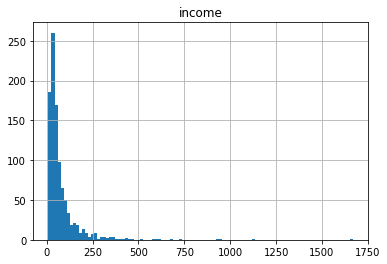

In [20]:
df.hist(column= "income", bins= 100)

In [34]:
#df[df.columns]
df.columns

'custcat'

In [51]:
X = df [['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
X[0:5]

#My work
#type(df[df.columns].values)
#type(X)
#X   #different type to do the same thing
#df[df.columns].values
#x01 = X[0:1]  #stored to use later for data standardization


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [45]:
#show the prediction variable
y = df[['custcat']]
y[0:5]


,custcat
0,1
1,4
2,3
3,1
4,3


Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [76]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

#my work
print(preprocessing.StandardScaler().fit(X))
#the aove line fits the data to StandardScalar module
#then the transform() method is called to tranform the data to z scores

StandardScaler(copy=True, with_mean=True, with_std=True)


In [61]:
x01

display(df.describe())  #gives the summary stats of the dataframe

df.region.value_counts() #gives the values and their counts. 



,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


3    344
2    334
1    322
Name: region, dtype: int64

In [75]:
region_stats = df.region.describe()

display(x01)
display(region_stats)
display(X[0:1][0][0])  # from sklearn tranformation  
display(((x01[0][0] - region_stats[1])/region_stats[2])) #from statistics using z score. 
# This is the value ((2 - 2.0220)/0.8162)  basically the z-score is given here. 

array([[ 2., 13., 44.,  1.,  9., 64.,  4.,  5.,  0.,  0.,  2.]])

count    1000.0000
mean        2.0220
std         0.8162
min         1.0000
25%         1.0000
50%         2.0000
75%         3.0000
max         3.0000
Name: region, dtype: float64

-0.026967670321120463

-0.026954183113314198

$$ preprocessing.StandardScaler() $$
Standardize features by removing the mean and scaling to unit variance

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

This scaler can also be applied to sparse CSR or CSC matrices by passing with_mean=False to avoid breaking the sparsity structure of the data.

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

print( "Train set ", X_train.shape, y_train.shape)
print( "Test set", X_test.shape, y_test.shape)

Train set  (800, 11) (800, 1)
Test set (200, 11) (200, 1)


In [81]:
from sklearn.neighbors import KNeighborsClassifier

k = 4 

neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [83]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [84]:
from sklearn import metrics

print("Train set accuracy ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set accuracy ", metrics.accuracy_score(y_test, yhat))

Train set accuracy  0.5475
Test set accuracy  0.32


### Dint work out from here

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)  #y is a pandas dataframe 
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800, 1)
Test set: (200, 11) (200, 1)


In [120]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc  = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    #print(type(yhat))
    #print(type(y_test))
    
    std_acc[n-1]=np.std(yhat==np.asanyarray(y_test))/np.sqrt(yhat.shape[0])
    
mean_acc

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

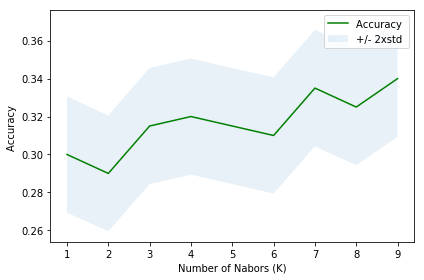

In [126]:
plt.plot(range(1,Ks),mean_acc,'g')
# plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - std_acc,mean_acc + std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 2xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [122]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9
